# Lecture 8

## Simple Pendulum

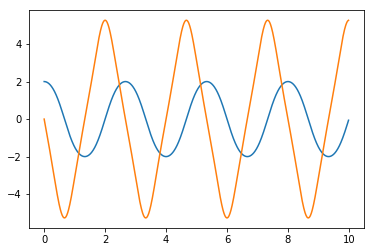

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import sin

ell = 1
g = 9.8

t0 = 0
t1 = 10
dt = 0.01

def f(theta, omega, t):
    """d(theta)/dt"""
    return omega

def h(theta, omega, t):
    """d(omega)/dt"""
    return -(g/ell)*sin(theta)

thetas = []
omegas = []

theta = 2.0
omega = 0

tpoints = np.arange(t0, t1, dt)

for t in tpoints:
    thetas.append(theta)
    omegas.append(omega)
    
    theta_k1 = dt*f(theta, omega, t)
    omega_k1 = dt*h(theta, omega, t)
    
    theta_k2 = dt*f(theta + 0.5*theta_k1, omega, t + 0.5*dt)
    omega_k2 = dt*h(theta, omega + 0.5*omega_k1, t + 0.5*dt)
    
## THIS SEEMS TO FIX THE "PROBLEM" ... probably a symmetry argument
    theta_k2 = dt*f(theta + 0.5*theta_k1, omega + 0.5*omega_k1, t + 0.5*dt)
    omega_k2 = dt*h(theta + 0.5*theta_k1, omega + 0.5*omega_k1, t + 0.5*dt)


    
    theta += theta_k2
    omega += omega_k2
    
plt.plot(tpoints, thetas, label='thetas')
plt.plot(tpoints, omegas, label='omegas')
plt.show()

## Something weird: centripetal force

This is interesting. I thought that a centripetal force would demonstrate the same issues as the simple pendulum, but energy is totally conserved.

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x, y, vx, vy, t):
    """dvx/dt"""
    return -x*(vx**2+vy**2)/(x**2+y**2)

def g(x, y, vx, vy, t):
    """dvy/dt"""
    return -y*(vx**2+vy**2)/(x**2+y**2)

def h(x, y, vx, vy, t):
    """dx/dt"""
    return vx

def k(x, y, vx, vy, t):
    """dy/dt"""
    return vy



xpoints = []
ypoints = []
vxpoints = []
vypoints = []

# initial values
x = 1
y = 0
vx = 0
vy = -1

t0 = 0
t1 = 300
dt = .01

tpoints = np.arange(t0, t1, dt)

for t in tpoints:
    xpoints.append(x)
    ypoints.append(y)
    vxpoints.append(vx)
    vypoints.append(vy)
    
    # RK
    vx_k1 = dt*f(x,y,vx,vy,t)
    vy_k1 = dt*g(x,y,vx,vy,t)
    x_k1 = dt*h(x,y,vx,vy,t)
    y_k1 = dt*k(x,y,vx,vy,t)

    vx_k2 = dt*f(
        x + 0.5*x_k1,
        y + 0.5*y_k1,
        vx + 0.5*vx_k1,
        vy + 0.5*vy_k1,
        t + 0.5*dt)
    
    vy_k2 = dt*g(
        x + 0.5*x_k1,
        y + 0.5*y_k1,
        vx + 0.5*vx_k1,
        vy + 0.5*vy_k1,
        t + 0.5*dt)
    
    x_k2 = dt*h(
        x + 0.5*x_k1,
        y + 0.5*y_k1,
        vx + 0.5*vx_k1,
        vy + 0.5*vy_k1,
        t + 0.5*dt)
    
    y_k2 = dt*k(
        x + 0.5*x_k1,
        y + 0.5*y_k1,
        vx + 0.5*vx_k1,
        vy + 0.5*vy_k1,
        t + 0.5*dt)
    
    x += x_k2
    y += y_k2
    vx += vx_k2
    vy += vy_k2

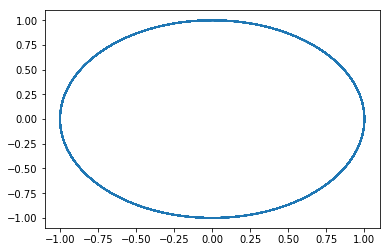

In [33]:
plt.plot(xpoints,ypoints)
plt.show()

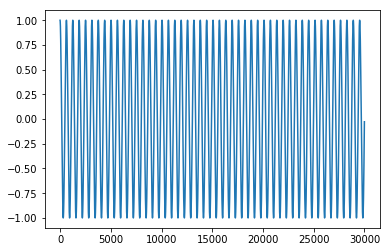

In [34]:
plt.plot(xpoints)
plt.show()

## "Fixed" Centripetal Force

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x, y, vx, vy, t):
    """dvx/dt"""
    return -x*(vx**2+vy**2)/(x**2+y**2)

def g(x, y, vx, vy, t):
    """dvy/dt"""
    return -y*(vx**2+vy**2)/(x**2+y**2)

def h(x, y, vx, vy, t):
    """dx/dt"""
    return vx

def k(x, y, vx, vy, t):
    """dy/dt"""
    return vy



xpoints = []
ypoints = []
vxpoints = []
vypoints = []

# initial values
x = 1
y = 0
vx = 0
vy = -1

t0 = 0
t1 = 50
dt = .01

tpoints = np.arange(t0, t1, dt)

for t in tpoints:
    xpoints.append(x)
    ypoints.append(y)
    vxpoints.append(vx)
    vypoints.append(vy)
    
    # RK
    vx_k1 = dt*f(x,y,vx,vy,t)
    vy_k1 = dt*g(x,y,vx,vy,t)
    x_k1 = dt*h(x,y,vx,vy,t)
    y_k1 = dt*k(x,y,vx,vy,t)

    vx_k2 = dt*f(
        x,
        y,
        vx + 0.5*vx_k1,
        vy,
        t + 0.5*dt)
    
    vy_k2 = dt*g(
        x,
        y,
        vx,
        vy + 0.5*vy_k1,
        t + 0.5*dt)
    
    x_k2 = dt*h(
        x + 0.5*x_k1,
        y,
        vx,
        vy,
        t + 0.5*dt)
    
    y_k2 = dt*k(
        x,
        y + 0.5*y_k1,
        vx,
        vy,
        t)
    
    x += x_k2
    y += y_k2
    vx += vx_k2
    vy += vy_k2

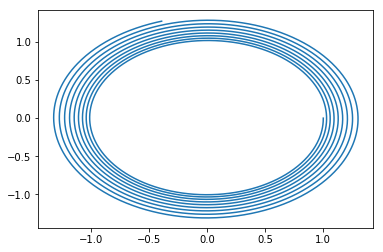

In [18]:
plt.plot(xpoints,ypoints)
plt.show()

## Centripetal force with leap frog

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x, y, vx, vy, t):
    """dvx/dt"""
    return -x*(vx**2+vy**2)/(x**2+y**2)

def g(x, y, vx, vy, t):
    """dvy/dt"""
    return -y*(vx**2+vy**2)/(x**2+y**2)

def h(x, y, vx, vy, t):
    """dx/dt"""
    return vx

def k(x, y, vx, vy, t):
    """dy/dt"""
    return vy



xpoints = []
ypoints = []
vxpoints = []
vypoints = []

# initial values
x = 1
y = 0
vx = 0
vy = -1


t0 = 0
t1 = 50
dt = .01

# iniitial half values
x_half = x + 0.5*dt*f(x,y,vx,vy,t0+0.5*dt)
y_half = y + 0.5*dt*g(x,y,vx,vy,t0+0.5*dt)
vx_half = vx + 0.5*dt*h(x,y,vx,vy,t0+0.5*dt)
vy_half = vy + 0.5*dt*k(x,y,vx,vy,t0+0.5*dt)



tpoints = np.arange(t0, t1, dt)

for t in tpoints:
    
    # Append full points
    xpoints.append(x)
    ypoints.append(y)
    vxpoints.append(vx)
    vypoints.append(vy)
    
    # Leapfrog
    x += dt*h(x_half,y_half,vx_half,vy_half,t+0.5*dt)
    y += dt*k(x_half,y_half,vx_half,vy_half,t+0.5*dt)
    vx += dt*f(x_half,y_half,vx_half,vy_half,t+0.5*dt)
    vy += dt*g(x_half,y_half,vx_half,vy_half,t+0.5*dt)
    
    # ... these depend on x[i+1] 
    x_half += dt*h(x,y,vx,vy,t+dt)
    y_half += dt*k(x,y,vx,vy,t+dt)
    vx_half += dt*f(x,y,vx,vy,t+dt)
    vy_half += dt*g(x,y,vx,vy,t+dt)

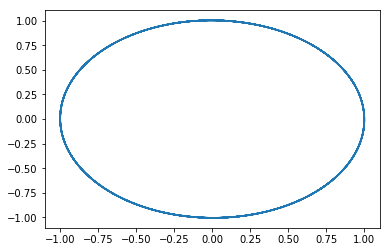

In [31]:
plt.plot(xpoints,ypoints)
plt.show()